In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取数据集csv文件
Anime = pd.read_csv("C:/Users/jie/Desktop/202006050040+吕佩洁.csv")

Text(0.5, 1.0, 'Type')

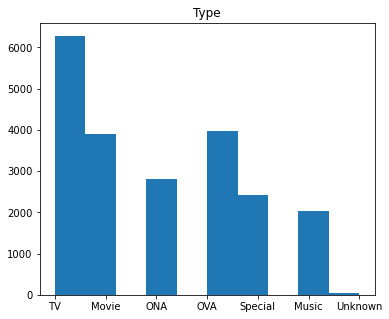

In [3]:
# 利用条形图观察有多少个动漫类型，和他们之间的数量差
plt.figure(figsize=(6,5))
plt.hist(Anime['Type'])
plt.xlabel("")
plt.ylabel("")
plt.title("Type")

In [4]:
# 把未播放的动漫、没有名字、没有评分和类型未知的数据去除
new_anime = Anime.drop(index= Anime.loc[( Anime['Status']=='Not yet aired')].index)
new_anime = new_anime.drop(index=new_anime.loc[(new_anime['Title']=='Unknown')].index)
new_anime = new_anime.drop(index=new_anime.loc[(new_anime['Score']=='Unknown')].index)
new_anime = new_anime.drop(index=new_anime.loc[(new_anime['Type']=='Unknown')].index)
# print(new_anime['Start_Aired'])
# 把Score评分为空的改为0
new_anime = new_anime.fillna(0,inplace=False)
new_score = new_anime.drop(index=new_anime.loc[(new_anime['Score']==0)].index)
# 把动漫类型分类,一共六类
TV = new_score.loc[new_score['Type'] == 'TV']
Movie = new_score.loc[new_score['Type'] == 'Movie']
OVA = new_score.loc[new_score['Type'] == 'OVA']
ONA = new_score.loc[new_score['Type'] == 'ONA']
Special = new_score.loc[new_score['Type'] == 'Special']
Music = new_score.loc[new_score['Type'] == 'Music']

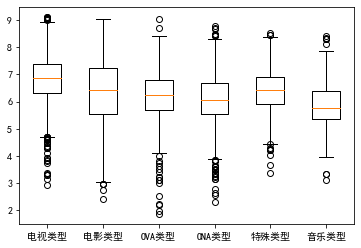

In [5]:
# 观察这六个不同类型的的评分分布
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.set_style({'font.sans-serif':['SimHei','Arial']})
TV_score = TV['Score']
Movie_score = Movie['Score']
OVA_score = OVA['Score']
ONA_score = ONA['Score']
Special_score = Special['Score']
Music_score = Music['Score']
plt.boxplot((TV_score,Movie_score,OVA_score,ONA_score,Special_score,Music_score),\
            labels=('电视类型','电影类型','OVA类型','ONA类型','特殊类型','音乐类型'))
plt.show()

In [6]:
from collections import Counter
Counter(TV['Demographics'])

Counter({'Shounen': 819,
         'Seinen': 350,
         'Unknown': 2417,
         'Shoujo': 298,
         'Kids': 300,
         'Josei': 52,
         'Kids, Shounen': 17,
         'Kids, Shoujo': 10})

In [7]:
from pyecharts.charts import Bar
from pyecharts import options as opts
attr = ['少年','青年','未知','少女','儿童','女性漫画','男性儿童','女性儿童']
data = [819,350,2417,298,300,52,17,10]
bar = (
    Bar()
    .add_xaxis(attr)
    .add_yaxis('人群分类数目',data)
    .set_global_opts(title_opts=opts.TitleOpts(title='电视类型动漫按照人群分布分类情况'))
)
bar.render_notebook()

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode


fn = """
    function(params) {
        if(params.name == '女性')
            return '\\n\\n\\n' + params.name + ' : ' + params.value ;
        return params.name + ' : ' + params.value ;
    }
    """


def new_label_opts():
    return opts.LabelOpts(formatter=JsCode(fn), position="center")


c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(["男性", "女性"], [1186, 360])],
        center=["30%", "30%"],
        radius=[45, 65],
        label_opts=new_label_opts(),
    )

    .set_global_opts(
        title_opts=opts.TitleOpts(title="电视类型动漫性别占比"
                                  ),
        legend_opts=opts.LegendOpts(
            type_="scroll", pos_top="20%", pos_left="80%", orient="vertical"
        ),
    )
)
c.render_notebook()

In [9]:
# 按人气排名，取前十名
TV_Popularity = TV.sort_values(by="Popularity",axis=0,ascending=True)[:10] 
TV_Popularity

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
5,31964,Boku no Hero Academia,Unknown,僕のヒーローアカデミア,My Hero Academia,"The appearance of ""quirks,"" newly discovered s...",TV,13.0,Finished Airing,"Apr 3, 2016",...,"School, Super Power",Shounen,24.0,PG-13 - Teens 13 or older,7.921,871325.0,6722.0,6,2708684,52169
6,20,Naruto,NARUTO,ナルト,Naruto,"Moments prior to Naruto Uzumaki's birth, a hug...",TV,220.0,Finished Airing,"Oct 3, 2002",...,Martial Arts,Shounen,23.0,PG-13 - Teens 13 or older,7.971,784527.0,5982.0,7,2557342,71876
7,22319,Tokyo Ghoul,"Tokyo Kushu, Toukyou Kushu, Toukyou Ghoul",東京喰種-トーキョーグール-,Tokyo Ghoul,A sinister threat is invading Tokyo: flesh-eat...,TV,12.0,Finished Airing,"Jul 4, 2014",...,"Gore, Psychological",Seinen,24.0,R - 17+ (violence & profanity),7.791,708575.0,9082.0,8,2556441,47433
8,38000,Kimetsu no Yaiba,Blade of Demon Destruction,鬼滅の刃,Demon Slayer Kimetsu no Yaiba,"Ever since the death of his father, the burden...",TV,26.0,Finished Airing,"Apr 6, 2019",...,Historical,Shounen,23.0,R - 17+ (violence & profanity),8.531,774255.0,1042.0,9,2550468,83110
9,11061,Hunter x Hunter (2011),HxH (2011),HUNTER×HUNTER（ハンター×ハンター）,Hunter x Hunter,Hunters devote themselves to accomplishing haz...,TV,148.0,Finished Airing,"Oct 2, 2011",...,Unknown,Shounen,23.0,PG-13 - Teens 13 or older,9.041,538454.0,92.0,10,2464157,188649


In [10]:
# 查看前十的评分，利用折线图观察，收藏夹利用条形图观察
from pyecharts.charts import Line
import pyecharts.options as options
from pyecharts.charts import Bar
from pyecharts.charts import Grid
from pyecharts.globals import ThemeType
from pyecharts.charts import *
attr = np.array(TV_Popularity['Title']).tolist()
line_data = np.array(TV_Popularity['Score']).tolist()
bar_data = np.array(TV_Popularity['Favorites']).tolist()
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line


bar = (
    Bar()
    .add_xaxis(attr)
    .add_yaxis(
        "收藏人数",
        bar_data,
        yaxis_index=0,
        color="#5793f3",    #稍微修改下颜色
    )

    .extend_axis(
        yaxis=opts.AxisOpts(
            type_="value",
            name="评分",
            min_=0,
            max_=10,
            position="left",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#d14a61")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name="收藏数",    
            min_=30000,
            max_=210000,
            position="right",
            offset=0,    #这里是Y轴间距，由80改为0即两个Y轴重合
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#5793f3")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        ),
        title_opts=opts.TitleOpts(title="电视类型前十受欢迎评分和收藏数"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
        xaxis_opts=opts.AxisOpts(name_rotate=60, axislabel_opts={"rotate": 15})
    )
)

line = (
    Line()
    .add_xaxis(attr)
    .add_yaxis(
        "评分",
        line_data,
        yaxis_index=1,    
        color="#675bba",
        label_opts=opts.LabelOpts(is_show=False),
    )
)

bar.overlap(line)
grid = Grid()
grid.add(bar, opts.GridOpts(pos_left="5%", pos_right="20%"), is_control_axis_index=True)
grid.render_notebook()

In [11]:
# 前十的主题分析和年龄定位，主题分析使用词云图
TV_Popularity['Themes']
# 绘制词云图
from pyecharts.charts import WordCloud
s_data = TV_Popularity['Themes'].value_counts()
s_data = pd.DataFrame(s_data)
words = list(s_data.index)
num = list(s_data['Themes'].values)
data = [k for k in zip(words, num)]
data = [(i,str(j)) for i, j in data]
workcloud = (WordCloud()
    .add(series_name=' ', data_pair=data, word_size_range=[0,40])
    .set_global_opts(title_opts=opts.TitleOpts(
        title='动漫主题词云图',title_textstyle_opts=
        opts.TextStyleOpts(font_size=23)),
                    tooltip_opts=opts.TooltipOpts(is_show=True))
            )
workcloud.render_notebook()
# TV_Popularity['Rating']

In [12]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode

Counter(TV_Popularity['Rating'])

c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(['R - 17+ (violence & profanity)','PG-13 - Teens 13 or older'],[6,4])],
    )

    .set_global_opts(
        title_opts=opts.TitleOpts(title="电视类型动漫前十受欢迎定位"),
        
        
    )
)
c.render_notebook()

In [13]:
# 再取倒数前十
TV_Unpopularity = TV.sort_values(by="Popularity",axis=0,ascending=False)[:10]
TV_Unpopularity

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
16340,38535,Huoli Shaonian Wang 3: Xuji,"Blazing Teens 3 Sequel, Huoli Shaonian Wang 3 ...",火力少年王3续集,Blazing Teens 4,A 26-episode second season sequel to Huoli Sha...,TV,26.0,Finished Airing,2012,...,Strategy Game,Kids,23.0,G - All Ages,6.011,111.0,90082.0,16365,272,0
16213,38379,Lei Su Deng Shandian Chong Xian 3,Race-Tin Flash & Dash 3,雷速登闪电冲线3,Flash & Dash S,The third season of Lei Su Deng Shandian Chong...,TV,40.0,Finished Airing,Nov 2012,...,Racing,Kids,24.0,G - All Ages,6.081,122.0,86632.0,16238,283,0
15925,27453,Pororo-wa Noraehaeyo,Pororo-wa Nolaehaeyo,뽀로로와 노래해요,Sing-A-Long with Pororo,Sing-A-Long with Pororo and his friends. The s...,TV,14.0,Finished Airing,2006,...,"Music, Performing Arts",Kids,3.0,G - All Ages,5.641,121.0,106002.0,15949,302,0
15801,27467,Yoligongju Loopy,Unknown,요리공주 루피,"Loopy, the Cooking Princess","A spin-off Pororo series focusing around food,...",TV,6.0,Finished Airing,2012,...,Unknown,Kids,5.0,G - All Ages,5.641,116.0,106032.0,15825,310,0
15581,37300,Xiao Liyu Lixian Ji,"The Carp Jumps Over the Dragon Gate, Liyu Tiao...",小鲤鱼历险记,The Adventures of Little Carp,"Bubbles, a carp, lives in Carp Lake with his g...",TV,52.0,Finished Airing,"Jun 1, 2007",...,Unknown,Kids,28.0,PG - Children,6.061,139.0,87582.0,15604,326,1
15454,38525,Chuldong! Super Wings,Unknown,출동! 슈퍼윙스,Super Wings,Super Wings follows the adventures of an adora...,TV,52.0,Finished Airing,"Sep 1, 2013",...,Racing,Kids,12.0,G - All Ages,5.811,133.0,99072.0,15477,337,1
15440,38534,Huoli Shaonian Wang 3,Unknown,火力少年王3,Blazing Teens 3,Huoli Shaonian Wang is a Chinese multi-media f...,TV,40.0,Finished Airing,2010,...,Strategy Game,Kids,24.0,G - All Ages,5.711,141.0,103232.0,15463,338,1
15309,38070,Kkoma Bus Tayo,Unknown,꼬마버스 타요 1,Tayo the Little Bus Season 1,Tayo the Little Bus is about exciting adventur...,TV,26.0,Finished Airing,"Aug 23, 2010",...,Racing,Kids,11.0,G - All Ages,5.731,148.0,102512.0,15332,349,0
15070,35643,Huoli Shaonian Wang zhi Chuanqi Zaixian,Unknown,火力少年王之传奇再现,Blazing Teens 5 Legendary Warriors,The 3rd Huoli Shaonian Wang animated season. I...,TV,40.0,Finished Airing,"Sep 9, 2014",...,Strategy Game,Kids,23.0,G - All Ages,5.951,129.0,93052.0,15093,367,3
15051,32221,Robocar Poli 2,Unknown,로보카 폴리,Unknown,"In Broom's Town, a small town with a strong re...",TV,26.0,Finished Airing,"Dec 26, 2011",...,"Detective, Racing",Kids,11.0,G - All Ages,5.621,121.0,106662.0,15074,370,1


In [14]:
# 查看倒数前十的评分，利用折线图观察，收藏夹利用条形图观察
from pyecharts.charts import Line
import pyecharts.options as options
from pyecharts.charts import Bar
from pyecharts.charts import Grid
from pyecharts.globals import ThemeType
from pyecharts.charts import *
uattr = np.array(TV_Unpopularity['Title']).tolist()
line_udata = np.array(TV_Unpopularity['Score']).tolist()
bar_udata = np.array(TV_Unpopularity['Favorites']).tolist()
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid, Line


ubar = (
    Bar()
    .add_xaxis(uattr)
    .add_yaxis(
        "收藏人数",
        bar_udata,
        yaxis_index=0,
        color="#5793f3",    #稍微修改下颜色
    )

    .extend_axis(
        yaxis=opts.AxisOpts(
            type_="value",
            name="评分",
            min_=0,
            max_=10,
            position="left",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#d14a61")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        )
    )
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            name="收藏数",    
            min_=0,
            max_=20,
            position="right",
            offset=0,    #这里是Y轴间距，由80改为0即两个Y轴重合
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="#5793f3")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        ),
        title_opts=opts.TitleOpts(title="电视类型倒数前十受欢迎评分和收藏数"),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
        xaxis_opts=opts.AxisOpts(name_rotate=60, axislabel_opts={"rotate": 15})
    )
)

uline = (
    Line()
    .add_xaxis(uattr)
    .add_yaxis(
        "评分",
        line_udata,
        yaxis_index=1,    
        color="#675bba",
        label_opts=opts.LabelOpts(is_show=False),
    )
)

ubar.overlap(uline)
ugrid = Grid()
ugrid.add(ubar, opts.GridOpts(pos_left="5%", pos_right="20%"), is_control_axis_index=True)
ugrid.render_notebook()


In [15]:
# 倒数前十的主题分析和年龄定位，主题分析使用词云图
TV_Unpopularity['Themes']
# 绘制词云图
from pyecharts.charts import WordCloud
s_data = TV_Unpopularity['Themes'].value_counts()
s_data = pd.DataFrame(s_data)
words = list(s_data.index)
num = list(s_data['Themes'].values)
data = [k for k in zip(words, num)]
data = [(i,str(j)) for i, j in data]
workcloud = (WordCloud()
    .add(series_name=' ', data_pair=data, word_size_range=[0,50])
    .set_global_opts(title_opts=opts.TitleOpts(
        title='动漫倒数前十主题词云图',title_textstyle_opts=
        opts.TextStyleOpts(font_size=23)),
                    tooltip_opts=opts.TooltipOpts(is_show=True))
            )
workcloud.render_notebook()

In [16]:
Counter(TV_Unpopularity['Rating'])

Counter({'G - All Ages': 9, 'PG - Children': 1})

In [17]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode


c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(['G - All Ages','PG - Children'],[9,1])],
    )

    .set_global_opts(
        title_opts=opts.TitleOpts(title="电视类型动漫倒数前十受欢迎定位"),
        
        
    )
)
c.render_notebook()